## Week 3:

New Topics:

 * Exploratory Data Analysis
  

Coding Task:

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data files
physicians = pd.read_csv('../data/primary_care_physicians.csv')
physicians.head()
population = pd.read_csv('../data/population_by_county.csv')

In [3]:
# Correct column variables and merge data files; create new coluumn for residents per pcp
population['county'].str.split(' County', expand = True)
population['county']=population['county'].str.split(' County', expand = True)[0]
population = population.loc[population['state'] == 'TENNESSEE']
physicians = pd.merge(left = physicians,
         right = population[['county','population', 'urban']])
physicians['residents_per_pcp'] = physicians['population'] / physicians['primary_care_physicians']

In [4]:
# Create categories for level of care
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [10]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,1009,Alabama,Blount,12.0,129927,Urban,10827.250000,low inadequate
1,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate
2,1027,Alabama,Clay,5.0,7654,Rural,1530.800000,moderately inadequate
3,5021,Arkansas,Clay,1.0,7654,Rural,7654.000000,low inadequate
4,12019,Florida,Clay,113.0,7654,Rural,67.734513,adequate


2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

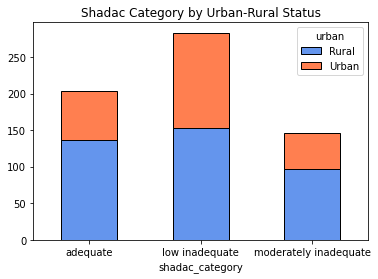

In [13]:
pd.crosstab(physicians['shadac_category'], physicians['urban']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('Shadac Category by Urban-Rural Status')                   # add a title
plt.xticks(rotation = 0);                                             # change the appearance of the x tick labels

In [14]:
pd.crosstab(physicians['shadac_category'], physicians['urban'],  normalize = 'index')

urban,Rural,Urban
shadac_category,,
adequate,0.671569,0.328431
low inadequate,0.540636,0.459364
moderately inadequate,0.664384,0.335616


3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [18]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
#unemployment.head()

In [19]:
unemployment['Name'].str.split(' County', expand = True)
unemployment['Name'] = unemployment['Name'].str.split(' County', expand = True)[0]
#unemployment.head()

In [20]:
physicians = pd.merge(left = physicians,
         right = unemployment.rename(columns = {'Name': 'county'}))
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,pcp_per_100k,laus_code,State,County,Period,LF,Employed,Unemployed,unemployment_rate
0,1009,Alabama,Blount,12.0,129927,Urban,10827.250000,low inadequate,0.108272,CN4700900000000,47,9,Mar-21,64098,61119,2979,4.6
1,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,0.014436,CN4700900000000,47,9,Mar-21,64098,61119,2979,4.6
2,1027,Alabama,Clay,5.0,7654,Rural,1530.800000,moderately inadequate,0.015308,CN4702700000000,47,27,Mar-21,2743,2557,186,6.8
3,5021,Arkansas,Clay,1.0,7654,Rural,7654.000000,low inadequate,0.076540,CN4702700000000,47,27,Mar-21,2743,2557,186,6.8
4,12019,Florida,Clay,113.0,7654,Rural,67.734513,adequate,0.000677,CN4702700000000,47,27,Mar-21,2743,2557,186,6.8


4. How do unemployment rates compare for urban counties versus rural counties?

In [23]:
physicians.groupby('urban')['unemployment_rate'].mean()

urban
Rural    5.818863
Urban    5.054878
Name: unemployment_rate, dtype: float64

5. Create a new column, pcp_per_100k which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [16]:
physicians['pcp_per_100k'] = (physicians['population']/100000) / physicians['primary_care_physicians']
physicians['pcp_per_100k']

0      0.108272
1      0.014436
2      0.015308
3      0.076540
4      0.000677
         ...   
628    0.075821
629    0.029632
630    0.051155
631    0.029685
632    0.018617
Name: pcp_per_100k, Length: 633, dtype: float64